In [1]:
import io
import glob

import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Bring in the utilities module
import sys
sys.path.insert(0, '../util')

# allow hot changes in util.py
import importlib
import util
importlib.reload(util)

from util import fit_Tc, replica_average, read_res

## Convergence analysis: plot `nmnm` distributions

In [3]:
def load_nmnm(fname):
    nmnm = np.loadtxt(fname)
    mask = nmnm[:, 1] > 0
    return nmnm[mask]

def overlay_gaussian(nm):
    """Cook up a gaussian shaped curve with sample 1st and 2nd moments.
    """
    x, y = nm.T
    m1 = (x * y).sum()
    m2 = ((x - m1)**2 * y).sum() 
    
    arr = np.exp(-(x - m1)**2 / 2 / m2)
    arr /= arr.sum()
    return arr 

def plot_nmnm(fnames, fname_unif):
    fig, axx = plt.subplots(len(fnames)//3+1, 3, figsize=(9, 15))

    for fname, ax in zip(fnames, axx.ravel()):
        nm = load_nmnm(fname)

        ax.plot(nm[:, 0], nm[:, 1], 'o')
        ax.plot(nm[:, 0], overlay_gaussian(nm), '-', lw=3)
        ax.set_title( fname.split("/nmnm_")[-1].split(".dat")[0])
        ax.grid(True)
        
        nm_unif = load_nmnm(fname_unif)
        ax.plot(nm_unif[:, 0], nm_unif[:, 1], '--', color='C4')
        
    plt.tight_layout()

## Collect MC data / compute the replica statistics

In [4]:
def resample_g_im(L, beta, reslines, show=False):
    """Read a set of result_XXX files and replica average g_im.
    
    reslines is the list of result_XXX files to process.
    """
    resdict = {"L": L, "beta": beta}
    
    df = read_res(reslines)
    print(reslines)
    
    from IPython.display import display
    display(df)
    
    samples = replica_average(df["g_im"], df["err_g_im"])

    m, s = samples.mean(), samples.std()
    resdict["g_im"] = m
    resdict["err_g_im"] = s
    print(m, '+/-', s)

    if show:
        plt.hist(samples, density=True, bins=100, histtype='step')
        plt.axvline(m, lw=5, color='C1')
        plt.axvspan(m-s, m+s, alpha=0.4, color='C1')
        plt.title(str(m) + "+/-" + str(s))
    return resdict

# Analyze $L=6$

### Analyze $L=6$, $\beta=4.0$

['../runs/amp_1.0/L6/res_L6b4.0r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r7a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r2a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r8a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.321321     0.000550            T  0.136399  0.001691   
1           1  0.211888     0.000307            T  0.085874  0.000355   
2           5  0.156504     0.000183            T  0.054526  0.000138   
3           6  0.326585     0.000678            T  0.124696  0.001345   
4           9  0.117743     0.000105            T  0.034717  0.000044   
5           4  0.431014     0.000904            T  0.160039  0.002685   
6           7  0.124376     0.000108            T  0.037920  0.000053   
7           2  0.177092     0.000240            T  0.066099  0.000229   
8           3  0.205078     0.000532            F  0.086724  0.000328   
9           8  0.378153     0.000705            T  0.158574  0.002495   

  conv_g_im       Z(mln)  
0         T   220.169894  
1         T   862.016638  
2         T  2694.605531  
3         T   239.907345  
4         T  7461.866148  
5         T   119.686337  
6         T  6184.813293  
7         T  1611.775748  
8         T  1030.255801  
9         T   121.122242

0.09455656603979902 +/- 0.00042910977029665594


<IPython.core.display.Javascript object>


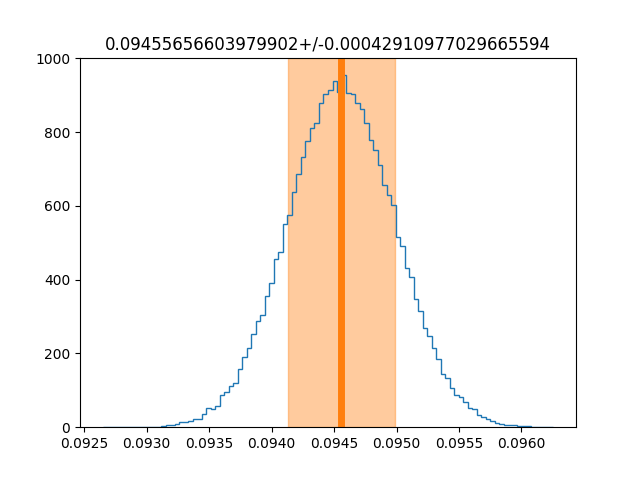

In [5]:
L, beta = 6, 4.0
dct_L6b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


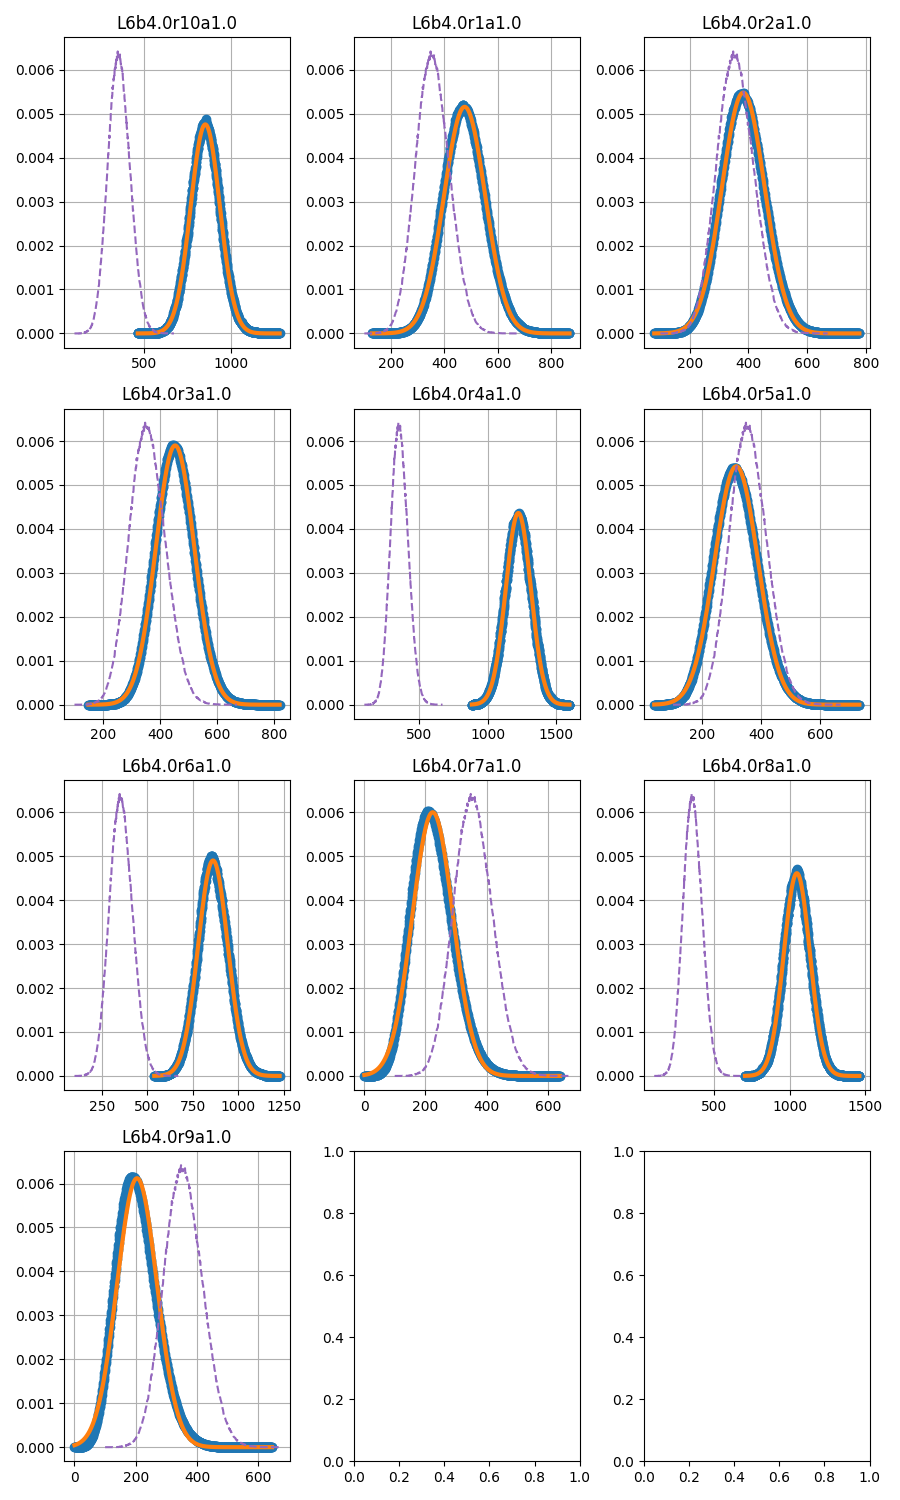

In [6]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b4.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

In [30]:
!ls ../runs/amp_1.0/L6/nmnm_L6b4.0*

../runs/amp_1.0/L6/nmnm_L6b4.0r10a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r1a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r2a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r3a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r4a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r5a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r6a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r7a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r8a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r9a1.0.dat


### Analyze $L=6$, $\beta=4.5$

['../runs/amp_1.0/L6/res_L6b4.5r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r7a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r8a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r2a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.320023     0.000592            T  0.200522  0.001837   
1           6  0.331709     0.000628            T  0.193638  0.002034   
2           3  0.202678     0.000239            F  0.129211  0.001029   
3           9  0.105477     0.000070            T  0.039811  0.000045   
4           5  0.142759     0.000148            T  0.069178  0.000155   
5           7  0.111853     0.000086            T  0.044577  0.000062   
6           4  0.437222     0.001165            F  0.242016  0.005274   
7           8  0.383620     0.000604            T  0.234292  0.003563   
8           1  0.203245     0.000597            T  0.124211  0.000552   
9           2  0.167923     0.000191            T  0.093241  0.000331   

  conv_g_im       Z(mln)  
0         T   133.346900  
1         T   115.000810  
2         T   521.399092  
3         T  7937.841124  
4         T  1877.800564  
5         T  4843.203308  
6         T    35.201513  
7         T    75.828291  
8         T   458.126473  
9         T   888.702034

0.1370696718806399 +/- 0.0007028114288806477


<IPython.core.display.Javascript object>


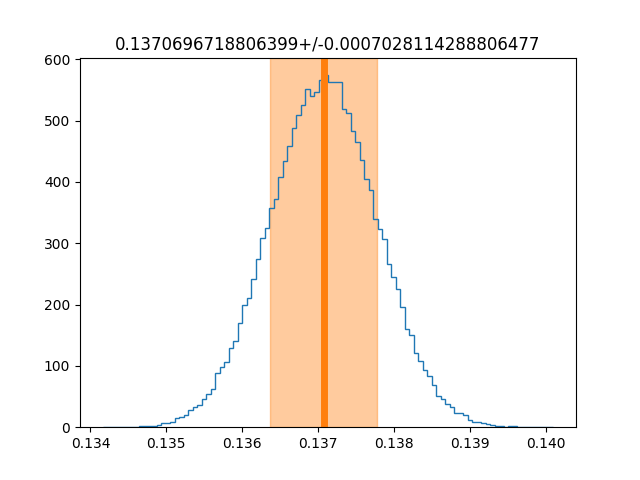

In [7]:
L, beta = 6, 4.5
dct_L6b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


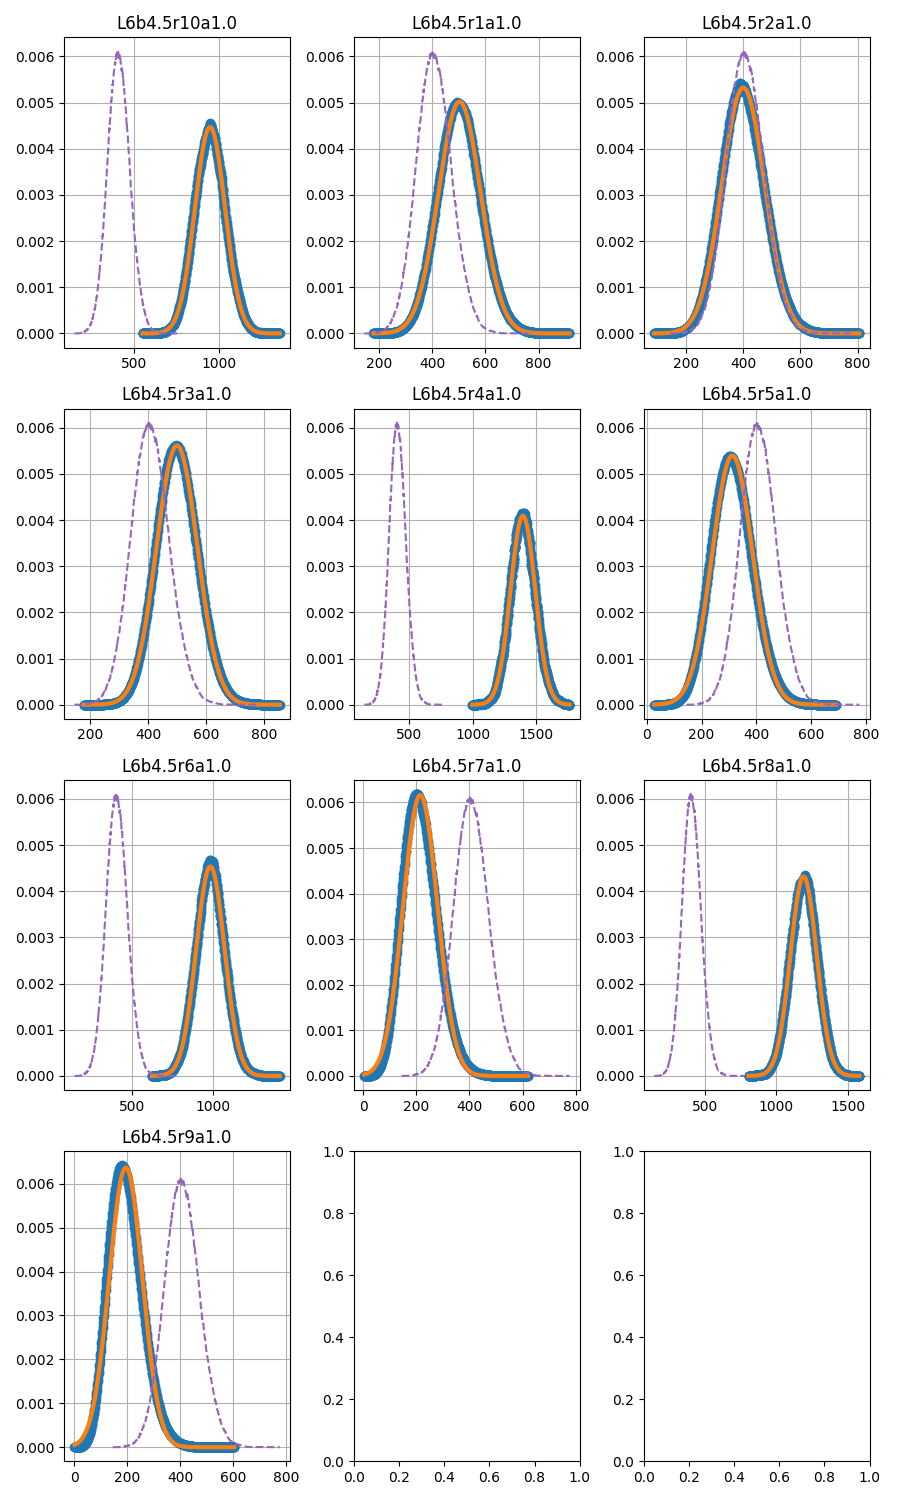

In [8]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b4.5*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=6$, $\beta=5.0$

['../runs/amp_1.0/L6/res_L6b5.0r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r2a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r8a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r7a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           6  0.337559     0.000644            T  0.246460  0.002762   
1           2  0.162719     0.000214            T  0.120442  0.000379   
2           8  0.388492     0.000750            T  0.282457  0.004560   
3           4  0.443650     0.000990            T  0.295129  0.006859   
4           1  0.197582     0.000266            T  0.155941  0.000620   
5          10  0.320045     0.000671            F  0.250677  0.003036   
6           5  0.134516     0.000106            T  0.083538  0.000166   
7           9  0.098112     0.000040            T  0.045277  0.000045   
8           3  0.201297     0.000223            T  0.162918  0.000818   
9           7  0.104372     0.000053            T  0.051875  0.000054   

  conv_g_im       Z(mln)  
0         T    79.979092  
1         T   768.278286  
2         T    45.060226  
3         T    26.163202  
4         T   391.431181  
5         T    83.519278  
6         T  2055.004605  
7         T  8670.439121  
8         T   376.213425  
9         T  7282.982351

0.16946886534559719 +/- 0.0009287145073432342


<IPython.core.display.Javascript object>


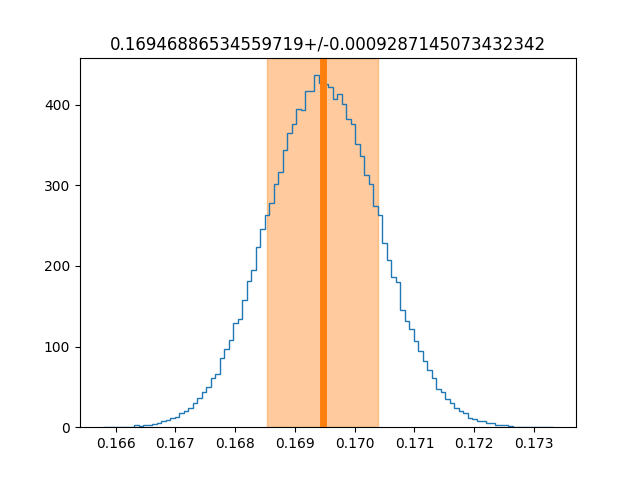

In [9]:
L, beta = 6, 5.0
dct_L6b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


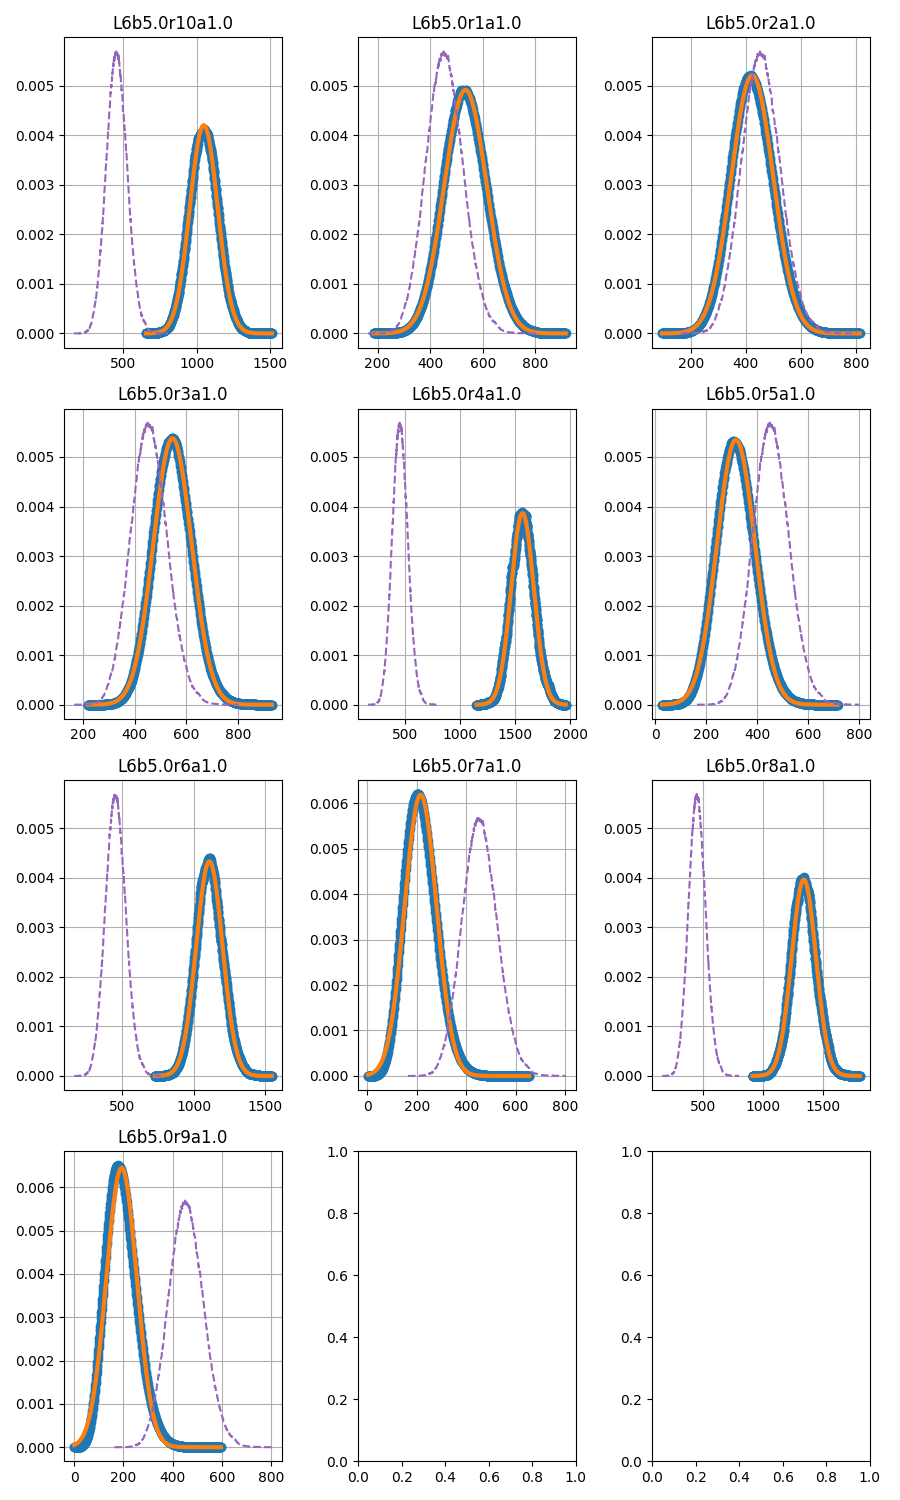

In [10]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b5.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b5.0_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=6 $

In [11]:
df = pd.DataFrame([dct_L6b40, dct_L6b45, dct_L6b50])
df

# SAVE L=6
df.to_csv("m5.2amp1.0L6_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,6,4.0,0.09455656603979902,0.00042910977029665594
1,6,4.5,0.1370696718806399,0.0007028114288806477
2,6,5.0,0.16946886534559719,0.0009287145073432342



## Read in $L=6$ 

In [12]:
df_L6 = pd.read_csv("m5.2amp1.0L6_av_replicas.dat")
df_L6

Unnamed: 0  L  beta      g_im  err_g_im
0           0  6   4.0  0.094557  0.000429
1           1  6   4.5  0.137070  0.000703
2           2  6   5.0  0.169469  0.000929

# Analyze $L=8$

### Analyze $L=8$, $\beta=4.0$

['../runs/amp_1.0/L8/res_L8b4.0r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r10a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r2a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r4a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           3  0.253708     0.002354            T  0.067878  0.004073   
1          10  0.333729     0.003438            T  0.091110  0.014140   
2           7  0.213224     0.005762            T  0.044208  0.001895   
3           9  0.153576     0.003410            T  0.027993  0.000613   
4           5  0.177586     0.002804            T  0.036701  0.001031   
5           2  0.255259     0.003299            T  0.081992  0.005485   
6           8  0.315644     0.001802            T  0.078197  0.005747   
7           6  0.372664     0.002961            T  0.109981  0.011632   
8           1  0.271971     0.002907            T  0.078252  0.003952   
9           4  0.357591     0.002665            T  0.115799  0.012062   

  conv_g_im      Z(mln)  
0         T   15.533806  
1         T    8.182191  
2         T   29.770996  
3         T  104.186897  
4         T   55.680360  
5         T   14.050862  
6         F    8.955302  
7         F    5.225994  
8         T   12.562257  
9         T    5.451559

0.07320744824419678 +/- 0.0024050746033017537


<IPython.core.display.Javascript object>


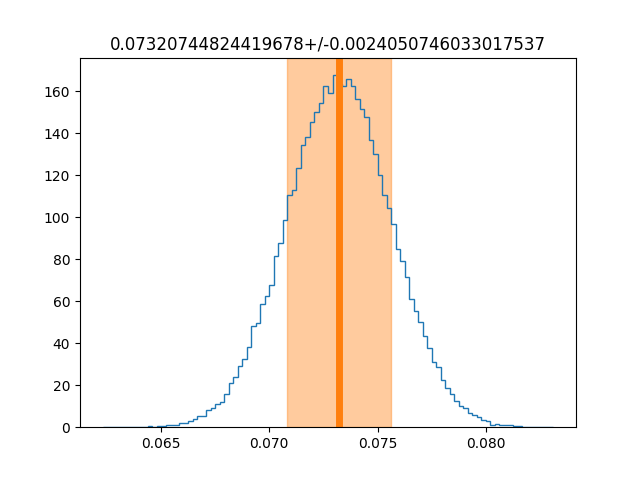

In [13]:
L, beta = 8, 4.0
dct_L8b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


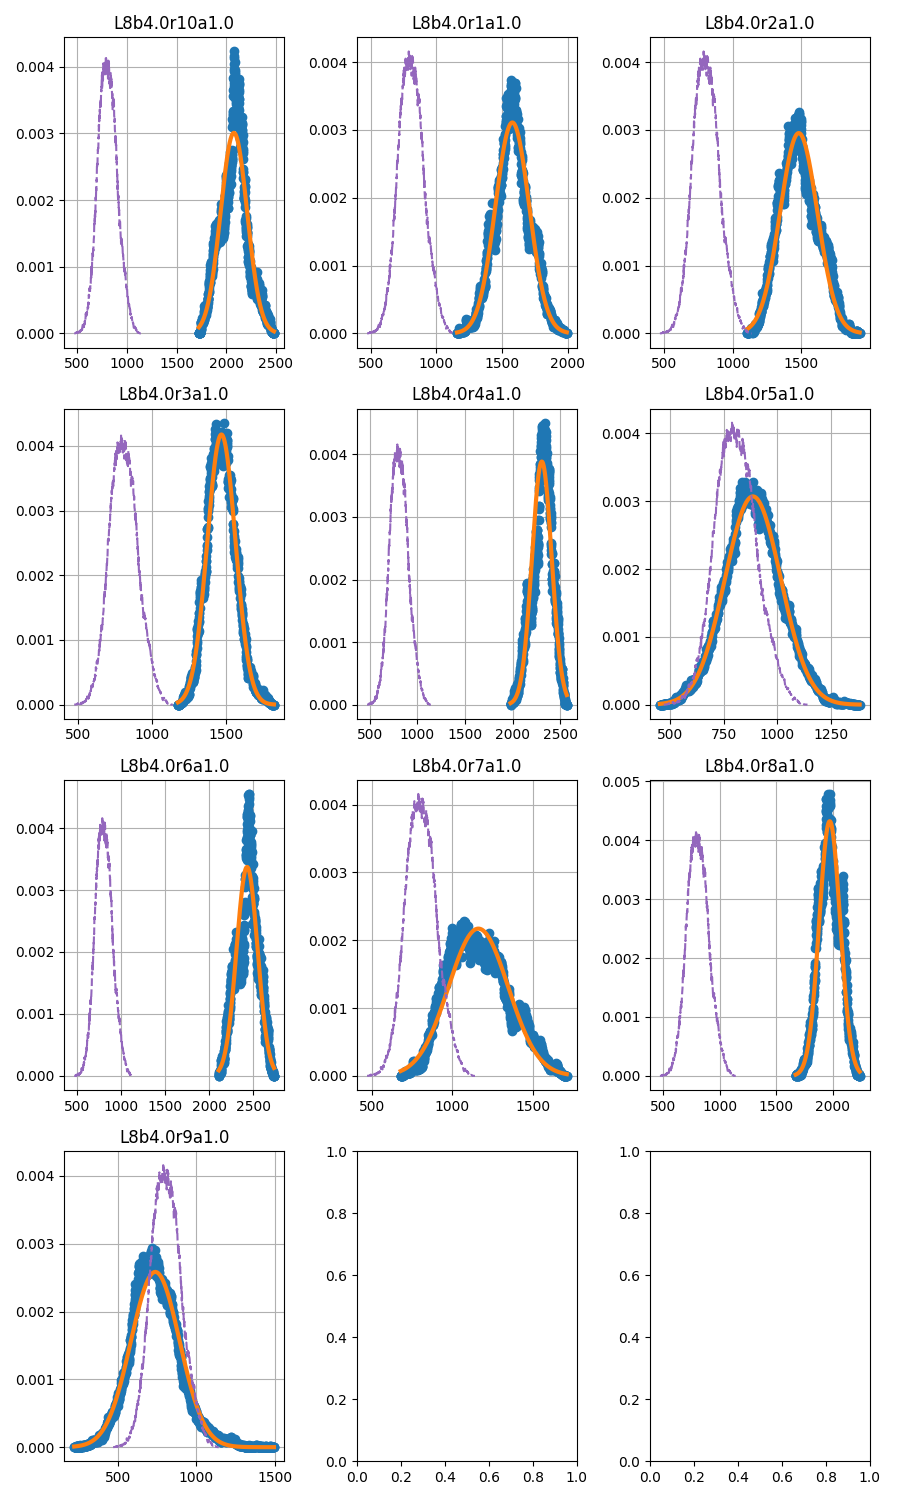

In [14]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b4.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta=4.5$

['../runs/amp_1.0/L8/res_L8b4.5r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r2a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r4a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r10a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           5  0.167378     0.002187            T  0.062579  0.002449   
1           2  0.242465     0.003817            T  0.131556  0.006040   
2           6  0.373445     0.004968            F  0.205774  0.029318   
3           7  0.177255     0.003950            T  0.065475  0.003187   
4           8  0.324998     0.003690            T  0.185167  0.022593   
5           3  0.248885     0.002167            T  0.148628  0.007986   
6           1  0.262232     0.002454            T  0.156526  0.011281   
7           9  0.134214     0.001467            T  0.038421  0.000948   
8           4  0.353499     0.003863            T  0.199687  0.023424   
9          10  0.331606     0.003105            T  0.176011  0.019784   

  conv_g_im     Z(mln)  
0         T  40.301125  
1         T   8.682090  
2         T   2.693365  
3         T  29.635679  
4         T   3.619163  
5         T   7.628402  
6         T   6.472898  
7         T  96.501751  
8         F   2.789633  
9         F   3.402280

0.13697628914905186 +/- 0.0050697543185388464


<IPython.core.display.Javascript object>


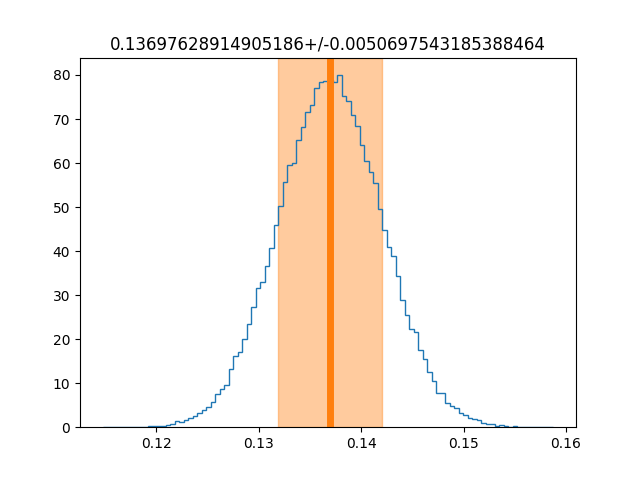

In [15]:
L, beta = 8, 4.5
dct_L8b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


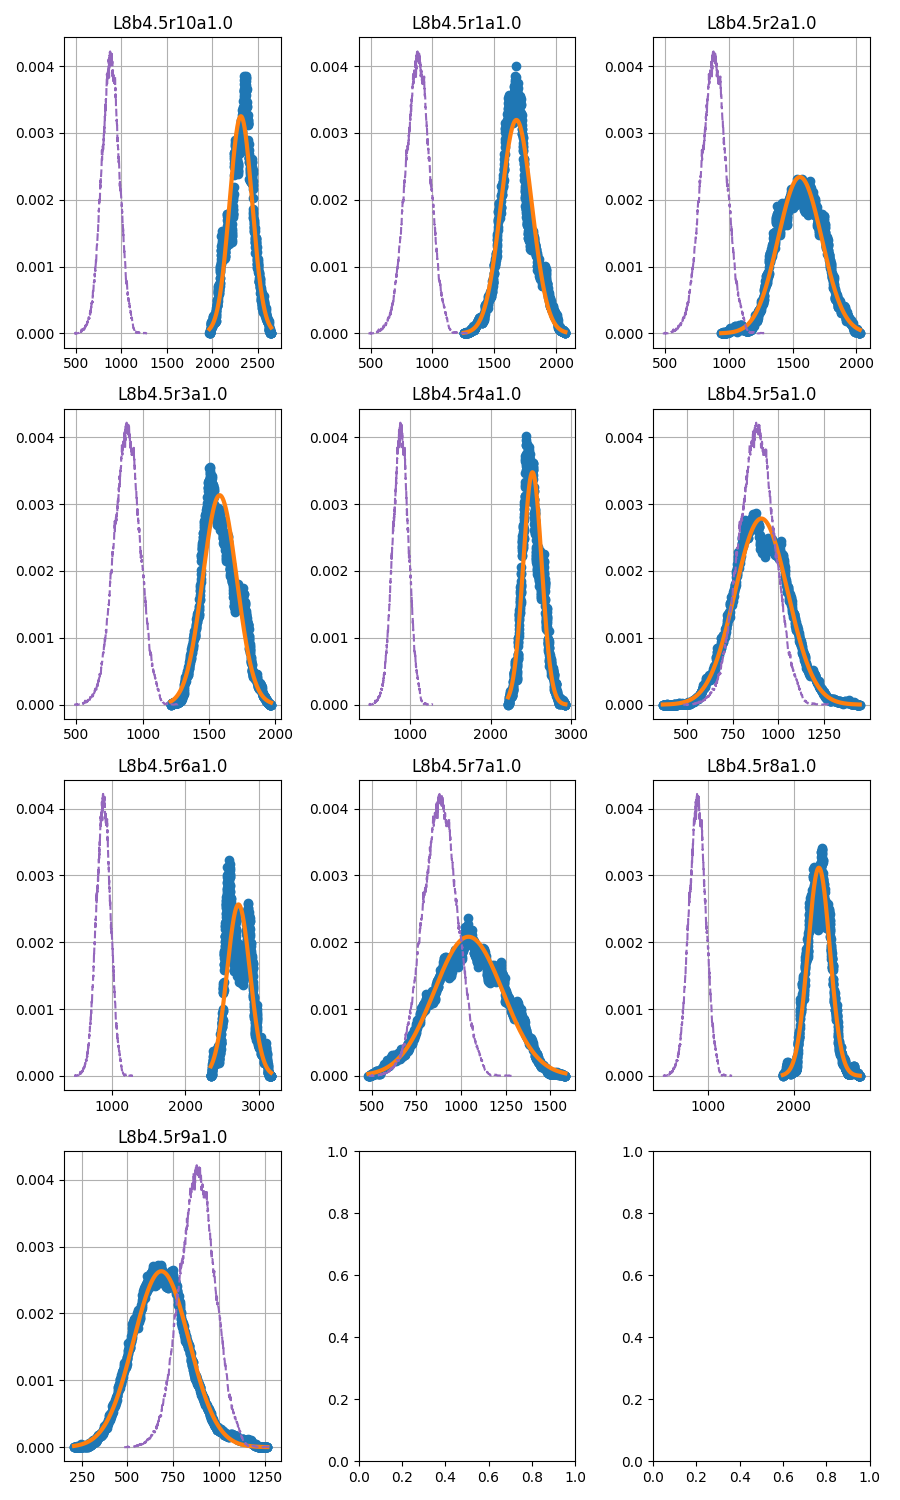

In [16]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b4.5*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta=5.0$

['../runs/amp_1.0/L8/res_L8b5.0r10a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r4a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r2a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.333235     0.001960            T  0.251910  0.015073   
1           3  0.250428     0.001996            T  0.195061  0.010109   
2           9  0.121736     0.001530            T  0.050259  0.001059   
3           4  0.365857     0.002593            T  0.300297  0.036211   
4           1  0.260927     0.002607            T  0.192908  0.011552   
5           6  0.380604     0.003008            T  0.243410  0.054900   
6           5  0.159122     0.001388            T  0.101592  0.003771   
7           7  0.172920     0.003718            T  0.104637  0.003553   
8           8  0.330586     0.007507            T  0.251817  0.024788   
9           2  0.243442     0.003576            T  0.217770  0.019231   

  conv_g_im     Z(mln)  
0         T   4.808008  
1         T   4.628819  
2         T  77.981503  
3         T   1.377996  
4         T   4.227480  
5         F   1.410352  
6         T  23.879477  
7         T  16.899388  
8         T   1.945514  
9         T   4.327774

0.19096426707134434 +/- 0.0076237466081202285


<IPython.core.display.Javascript object>


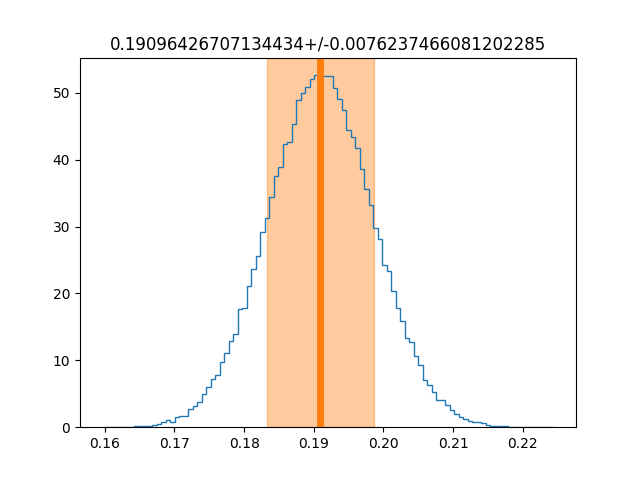

In [17]:
L, beta = 8, 5.0
dct_L8b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


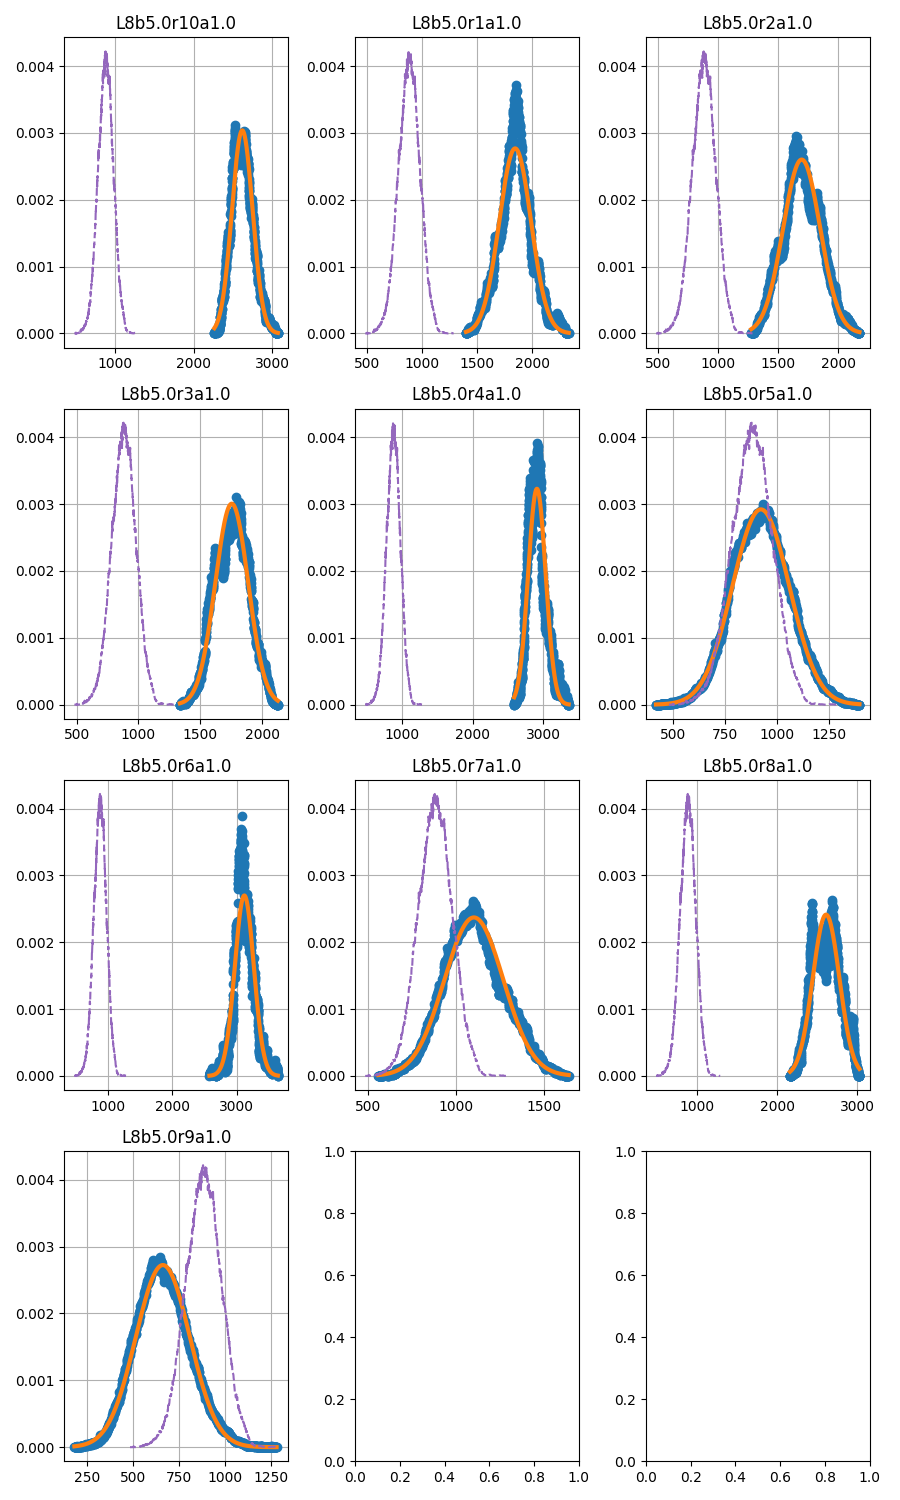

In [18]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b5.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=8 $

In [19]:
df = pd.DataFrame([dct_L8b40, dct_L8b45, dct_L8b50])
df

L  beta      g_im  err_g_im
0  8   4.0  0.073207  0.002405
1  8   4.5  0.136976  0.005070
2  8   5.0  0.190964  0.007624

In [20]:
# SAVE L=8
df.to_csv("m5.2amp1.0L8_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,8,4.0,0.07320744824419678,0.0024050746033017537
1,8,4.5,0.13697628914905186,0.0050697543185388464
2,8,5.0,0.19096426707134434,0.0076237466081202285



## Read in $L=8$ 

In [21]:
df_L8 = pd.read_csv("m5.2amp1.0L8_av_replicas.dat")
df_L8

Unnamed: 0  L  beta      g_im  err_g_im
0           0  8   4.0  0.073207  0.002405
1           1  8   4.5  0.136976  0.005070
2           2  8   5.0  0.190964  0.007624

# Analyze $L=12$

### Analyze $L=12$, $\beta=4.2$

['../runs/amp_1.0/L12/res_L12b4.2r4a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r5a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r1a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r9a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r6a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r3a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r2a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r7a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r8a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r10a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           4  0.305976     0.003910            T  0.121286  0.033245   
1           5  0.219516     0.002803            F  0.021350  0.003356   
2           1  0.267203     0.005715            F  0.091740  0.020359   
3           9  0.166726     0.007140            T  0.014030  0.000820   
4           6  0.299895     0.001981            F  0.161447  0.042308   
5           3  0.257216     0.001315            F  0.038231  0.006346   
6           2  0.246353     0.002902            F  0.052206  0.007986   
7           7  0.176632     0.000865            T  0.018065  0.001505   
8           8  0.265799     0.000879            T  0.077108  0.020732   
9          10  0.282088     0.001461            T  0.063467  0.015891   

  conv_g_im    Z(mln)  
0         T  0.394187  
1         F  2.398986  
2         T  0.488031  
3         T  6.690432  
4         T  0.323671  
5         T  1.180932  
6         F  1.075720  
7         T  4.914221  
8         T  0.728801  
9         T  0.706849

0.06589969407452936 +/- 0.006414278665480514


<IPython.core.display.Javascript object>


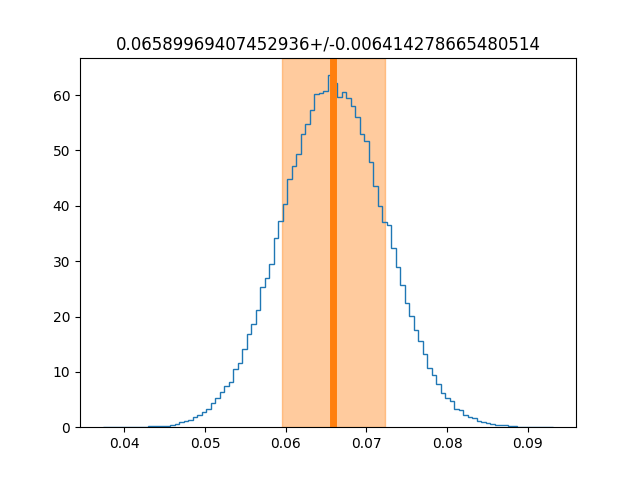

In [22]:
L, beta = 12, 4.2
dct_L12b42 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


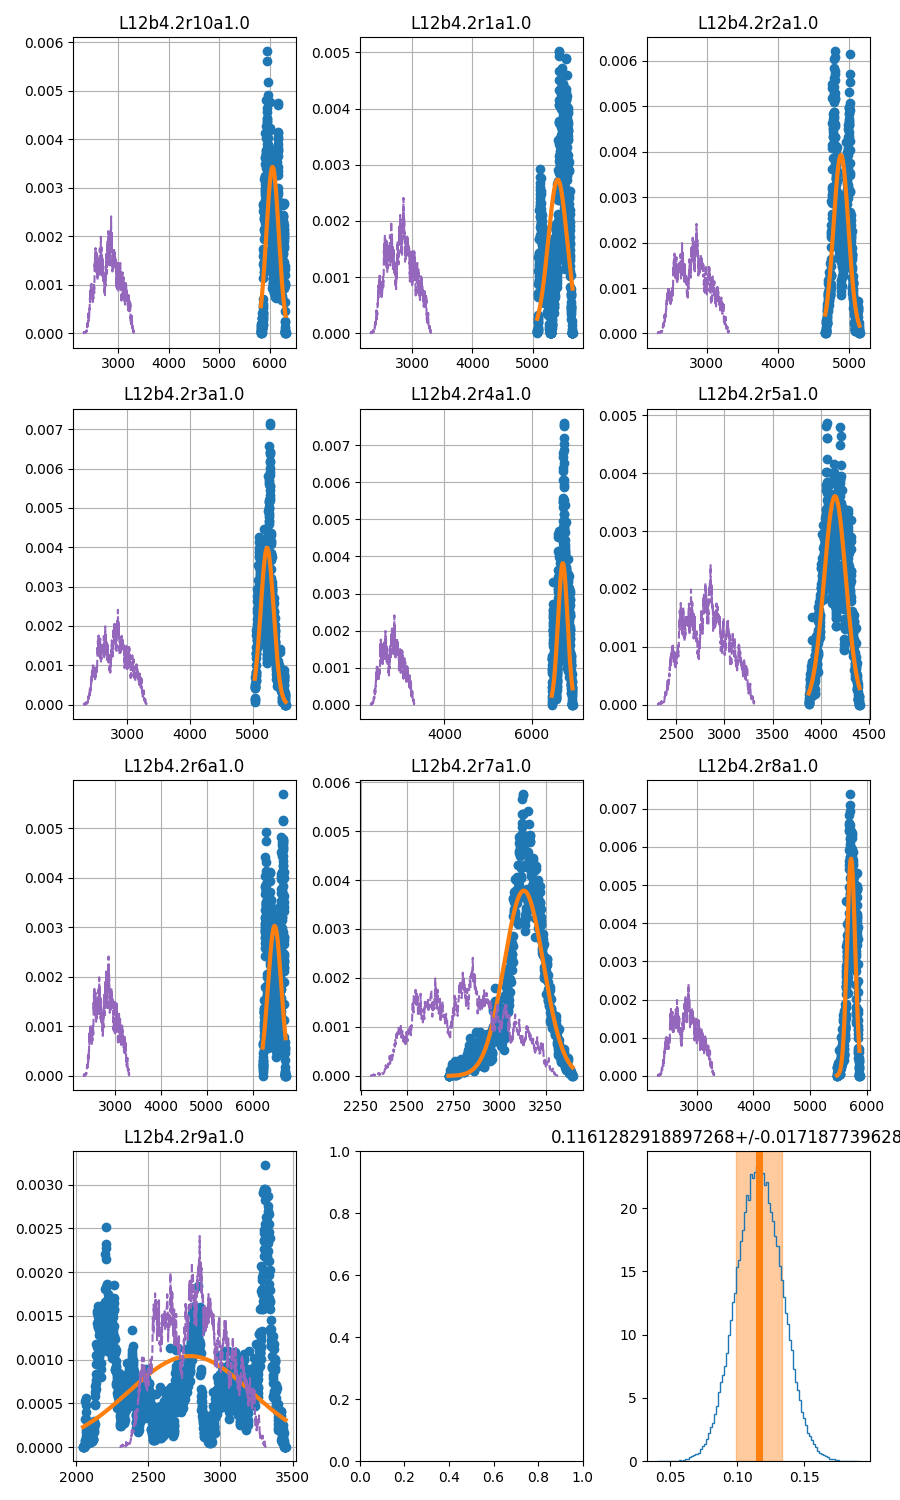

In [23]:
fnames = !ls ../runs/amp_1.0/L12/nmnm_L12b4.2*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.2_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=12$, $\beta=4.55$

In [24]:
L, beta = 12, 4.55
dct_L12b455 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_1.0/L12/res_L12b4.55r5a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r1a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r6a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r10a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r4a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r9a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r2a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r7a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r8a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r3a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           5  0.208076     0.000758            T  0.060601  0.011631   
1           1  0.248513     0.002540            F  0.041656  0.012821   
2           6  0.301392     0.005469            F  0.260993  0.126704   
3          10  0.283821     0.001431            T  0.176832  0.045269   
4           4  0.311391     0.003283            T  0.219856  0.068779   
5           9  0.137503     0.003298            T  0.018047  0.001856   
6           2  0.233937     0.002661            T  0.061865  0.010132   
7           7  0.199336     0.000861            F  0.031037  0.003215   
8           8  0.271667     0.002475            F  0.196341  0.074613   
9           3  0.248494     0.001338            T  0.094410  0.022381   

  conv_g_im    Z(mln)  
0         T  1.140250  
1         F  1.040726  
2         F  0.158163  
3         T  0.286246  
4         T  0.189114  
5         T  7.853802  
6         T  0.881792  
7         T  2.220033  
8         T  0.271898  
9         T  0.600643

0.1161282918897268 +/- 0.017187739628561526


<IPython.core.display.Javascript object>


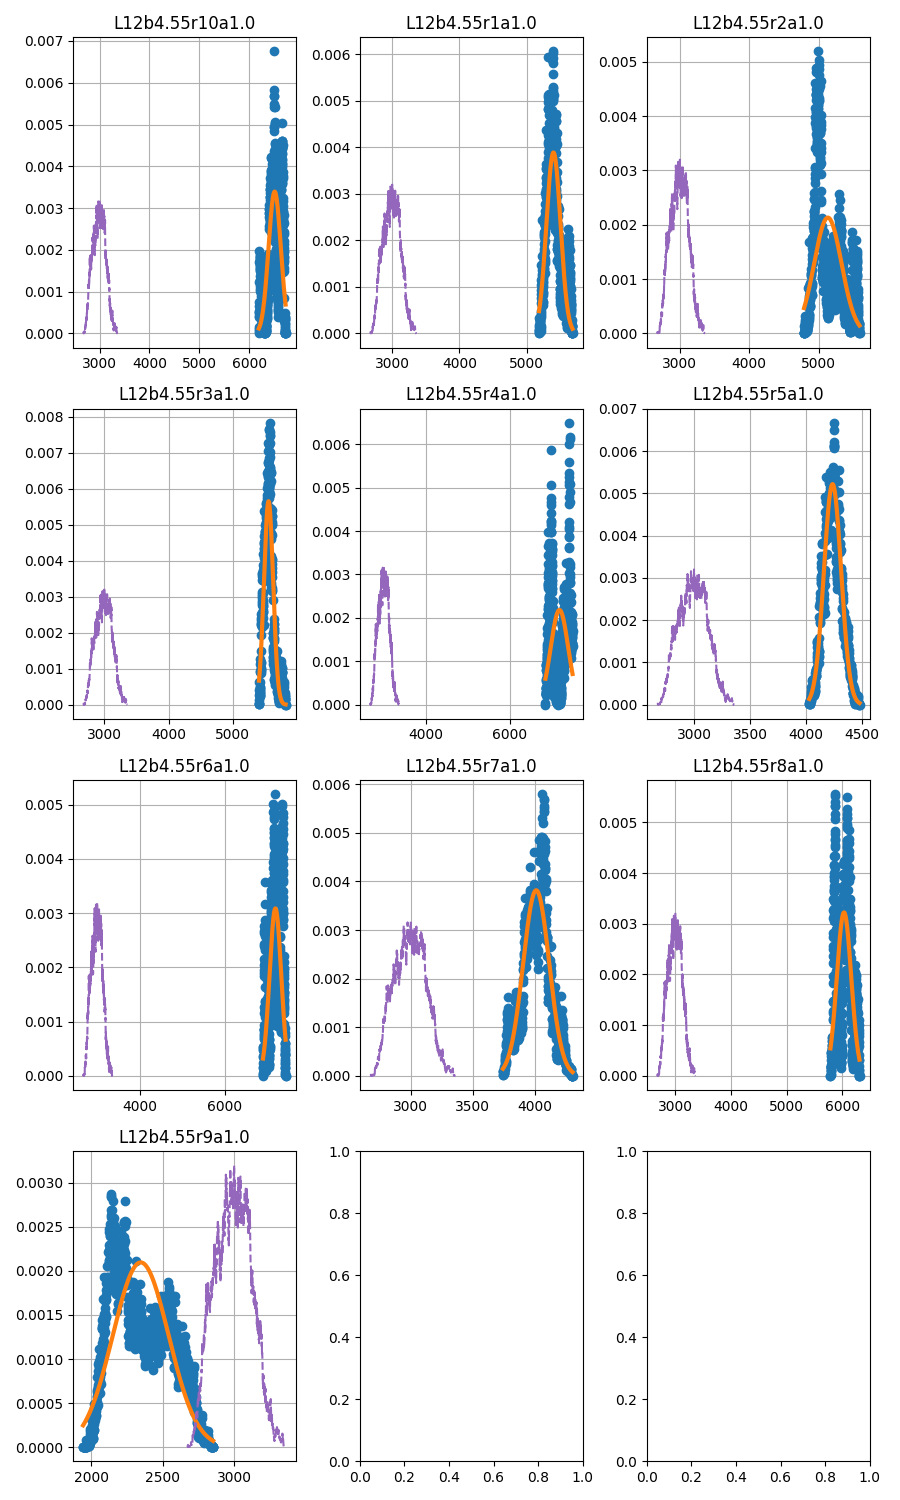

In [25]:
fnames = !ls ../runs/amp_1.0/L12/nmnm_L12b4.55*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.55_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=12 $

In [26]:
df = pd.DataFrame([dct_L12b42, dct_L12b455])
df

L  beta      g_im  err_g_im
0  12  4.20  0.065900  0.006414
1  12  4.55  0.116128  0.017188

In [27]:
# SAVE L=12
df.to_csv("m5.2amp1.0L12_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,12,4.2,0.06589969407452936,0.006414278665480514
1,12,4.55,0.1161282918897268,0.017187739628561526



## Read in $L=12$ 

In [28]:
df_L12 = pd.read_csv("m5.2amp1.0L12_av_replicas.dat")
df_L12

Unnamed: 0   L  beta      g_im  err_g_im
0           0  12  4.20  0.065900  0.006414
1           1  12  4.55  0.116128  0.017188

# Read in and cross for Tc

In [29]:
df_L6 = pd.read_csv("m5.2amp1.0L6_av_replicas.dat")
df_L8 = pd.read_csv("m5.2amp1.0L8_av_replicas.dat")
df_L12 = pd.read_csv("m5.2amp1.0L12_av_replicas.dat")
df_L6L8L12 = pd.concat([df_L6, df_L8, df_L12])
df_L6L8L12

Unnamed: 0   L  beta      g_im  err_g_im
0           0   6  4.00  0.094557  0.000429
1           1   6  4.50  0.137070  0.000703
2           2   6  5.00  0.169469  0.000929
0           0   8  4.00  0.073207  0.002405
1           1   8  4.50  0.136976  0.005070
2           2   8  5.00  0.190964  0.007624
0           0  12  4.20  0.065900  0.006414
1           1  12  4.55  0.116128  0.017188

In [30]:
fig, ax = plt.subplots(1, 1)
    
for L, grp in df_L6L8L12.groupby("L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o-', elinewidth=3, label=r"$L=%s$ amp1.0" % L)

ax.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>